In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')

#Boa prática recomenda colocar os imports e from em ordem alfabética

C:\Users\vitor.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.shape

(614, 13)

In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

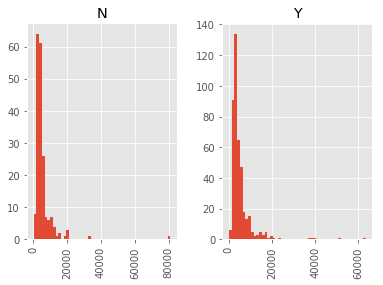

In [7]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50, by = 'Loan_Status')
plt.show()

In [8]:
coapplicants = df['CoapplicantIncome']
coapplicants.head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [9]:
coapplicants = coapplicants.apply(lambda x: 'N' if x == 0 else 'Y')
## Função Lambda funciona como:
# def nome_de_funcao(x)
# if x==0:
#        return 'N'
#    else:
#        return'Y'

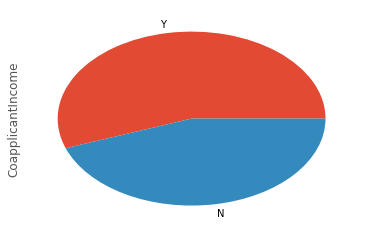

In [10]:
coapplicants.value_counts().plot(kind='pie')
plt.show()

In [11]:
##df.drop('Loan_ID')
#Procura por padrão a linha trocar para Coluna. 
df.drop('Loan_ID', axis=1, inplace=True)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.columns = ['is_Male', 'is_Married', 'Dependents', 'is_Gratuated','is_Self_Employed', 
             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'has_Credit_History',
              'Property_Area', 'Loan_Status']

#Renomeando colunas

In [14]:
mapper1 = {'Yes':1, 'No':0}
df['is_Married'] = df['is_Married'].map(mapper1)

In [15]:
mapper2 = {'Y':1, 'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper2)

In [16]:
df.head()

,is_Male,is_Married,Dependents,is_Gratuated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [17]:
#Contar dados nulos por coluna
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
is_Gratuated           0
Dependents             0
is_Male                0
dtype: int64

In [18]:
df.dropna(subset=['is_Married'], inplace = True)

In [19]:
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            21
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
is_Gratuated           0
Dependents             0
is_Married             0
is_Male                0
dtype: int64

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
#Colocando valor da média no s valor de amount que são nulos. 

In [21]:
df['has_Credit_History'].value_counts()
#Contar os valores da coluna separados por tipo

1.0    472
0.0     89
Name: has_Credit_History, dtype: int64

In [22]:
df['has_Credit_History'].fillna(1, inplace=True)
#colocando 1 no lugar do NaN. 

In [23]:
#Contar dados nulos por coluna (Confirmando que agora está OK)
df.isnull().sum().sort_values(ascending=False)

Loan_Status           0
Property_Area         0
has_Credit_History    0
Loan_Amount_Term      0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
is_Self_Employed      0
is_Gratuated          0
Dependents            0
is_Married            0
is_Male               0
dtype: int64

In [24]:
df['Property_Area'].unique()
#Explicitando os valores que existem na coluna

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
df = pd.get_dummies(df, columns=['Property_Area'])
#Criando variáveis Dummies para a coluna 'Property_Area' e deleta a mesma, deixando apenas as dummies  

In [26]:
df.corr()
#Tabela de correlações

,is_Male,is_Married,Dependents,is_Gratuated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.108135,-0.082177,0.010004,0.019381,0.079452,-0.105347,0.031761
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.089280,-0.004520,0.003744,0.000514
Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.163692,-0.103619,-0.038736,0.012593,-0.003147,0.004086,-0.001169
is_Gratuated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.166864,0.073701,0.072670,0.084286,-0.075984,0.038022,0.034363
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.115500,-0.033421,-0.000757,-0.002404,0.020858,0.009885,-0.030407
ApplicantIncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.005154,0.016269,-0.016002,0.000756
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.188151,-0.059135,0.012093,-0.057733,0.003860,-0.025199,0.022269
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,1.000000,0.036135,-0.001631,-0.036782,0.043538,-0.008376,-0.033530
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.023619,0.035425,0.058878,-0.095081
has_Credit_History,0.010004,0.009481,-0.038736,0.072670,-0.000757,-0.018900,0.012093,-0.001631,-0.005291,1.000000,0.540021,-0.019637,0.034905,-0.017002


In [27]:
#Criando sistema de cores customizado.
from matplotlib.colors import ListedColormap  #Importar biblioteca


flatui = ['#FF0001', '#E34646', '#FFFFFF', '#E34646', '#FF0001'] #escolher vetor de cores
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex()) #aplicando o vetor à função 

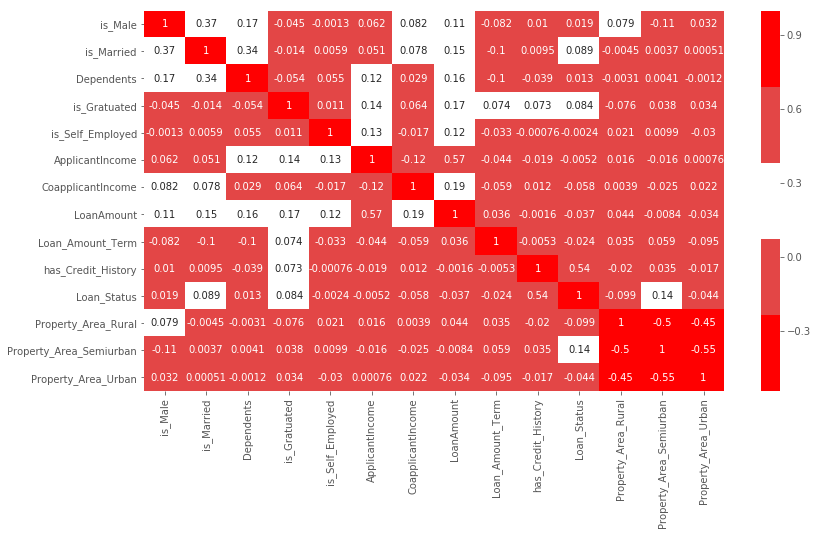

In [28]:
plt.figure(figsize=(13,7)) #Colocando o tamanho desejado
sns.heatmap(df.corr(), annot=True, cmap=my_cmap) #Criando o mapa de calor: "annot" para mostrar número; abs=colocar módulo
plt.show() #Exibir a tabela

In [29]:
df['TotalIncome'] = df['ApplicantIncome']+ df['CoapplicantIncome'] 
#Unificando as colunas para achar o total de salários (cônjuge e pessoal)

In [30]:
#normalizando os dados
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])
df.loc[df['CoapplicantIncome'] == 0, 'CoapplicantIncome'] = 1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [31]:
X = df.drop('Loan_Status', axis=1) #Eliminando a variável resposta do banco de variáveis explicativas 

y= df['Loan_Status'] #Definindo a variável resposta 

In [32]:
#Criando e setando o teste: tamando da amostra que será usado no teste
#Resultado será retornado em tupla e antes do "=" será o nome dessas colunas da tupla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 

In [33]:
lr = LogisticRegression() #Criando o objeto que tem o estimador de regressão. 
lr.fit(X_train, y_train) #Retorna parâmetros utilizados no modelo

print('Score no conjunto de treino:{0:.2%}'.format(lr.score(X_train, y_train)))
#Ver o qual a média de assertividade do modelo em relação ao treino

print('Score no conjunto de teste:{0:.2%}'.format(lr.score(X_test, y_test))) 
#Ver a média de assetividade do modelo em relação ao teste. 

Score no conjunto de treino:80.44%
Score no conjunto de teste:82.18%


In [34]:
dt = DecisionTreeClassifier(max_depth=4) 

#Criando o modelo do objeto de Decision Tree: Opção de colocar número de decisões que serão analisadas. 

dt.fit(X_train, y_train)  #Fazer treino do modelo

print('Score no conjunto de treino:{0:.2%}'.format(dt.score(X_train, y_train)))
#Ver o qual a média de assertividade do modelo em relação ao treino

print('Score no conjunto de teste:{0:.2%}'.format(dt.score(X_test, y_test))) 
#Ver a média de assetividade do modelo em relação ao teste. 

Score no conjunto de treino:82.64%
Score no conjunto de teste:83.17%


In [35]:
importance = list(zip(dt.feature_importances_,X_train.columns)) 

#Ver quão relevante é cada coluna para o modelo 

importance

[(0.01066161532525964, 'is_Male'),
 (0.0, 'is_Married'),
 (0.0, 'Dependents'),
 (0.0, 'is_Gratuated'),
 (0.0, 'is_Self_Employed'),
 (0.00863590841346034, 'ApplicantIncome'),
 (0.04342760972747744, 'CoapplicantIncome'),
 (0.02627059425320548, 'LoanAmount'),
 (0.0231180994359439, 'Loan_Amount_Term'),
 (0.7224260802273454, 'has_Credit_History'),
 (0.0, 'Property_Area_Rural'),
 (0.05914039870676859, 'Property_Area_Semiurban'),
 (0.0, 'Property_Area_Urban'),
 (0.10631969391053918, 'TotalIncome')]

In [36]:
#criando uma árvore de decisão: Colocar o "setseed" para 42

rf = RandomForestClassifier(random_state=42) 
rf.fit(X_train, y_train)

print('Score no conjunto de treino:{0:.2%}'.format(rf.score(X_train, y_train)))
#Ver o qual a média de assertividade do modelo em relação ao treino
print('Score no conjunto de teste:{0:.2%}'.format(rf.score(X_test, y_test))) 
#Ver a média de assetividade do modelo em relação ao teste. 

Score no conjunto de treino:98.78%
Score no conjunto de teste:75.25%


In [37]:
dt.predict([X_test.iloc[0]]) 

#Usar esse modelo para qualquer data set (X)

array([1], dtype=int64)

In [38]:
X_test ['Loan_Status'] = dt.predict(X_test) #Cria a 'Loan Status' com resultado usando o modelo. 

C:\Users\vitor.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
X_test.to_csv('clientes_previstos.csv', index = False) #Exporta csv com nova tabela incluind resultados. 

In [40]:
#exportar o objeto do modelo e usar o pickle load para importar. 
pickle.dump(dt, open('modelo.sav', 'wb'))